SP02 Project

1. Reading image

In [21]:
import cv2 as cv
import numpy as np

In [12]:
data_pic = cv.imread("./imp.jpg")
dis_pic(data_pic)

In [7]:
# cv.imshow('image',data_pic)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [10]:
def dis_pic(pic_name):
    cv.imshow('image',pic_name)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

2. Reading dimentions

In [33]:
data_pic_red = data_pic[:,:,1]
# dis_pic(data_pic_red)
filtered_pic = max_rgb_filter(data_pic)
# cv.imshow("Images", np.hstack([data_pic, f]))
# cv.waitKey(0)

In [25]:
def max_rgb_filter(image):
    (B, G, R) = cv.split(image)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0

    return cv.merge([B, G, R])

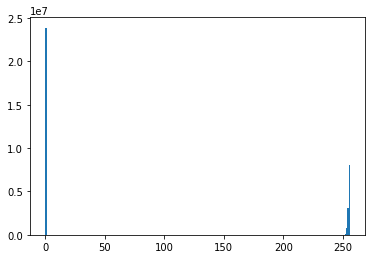

In [34]:
import matplotlib.pyplot as plt
plt.hist(filtered_pic.ravel(),256,[0,256]); plt.show()

In [39]:
bgr_planes = cv.split(data_pic)
print(bgr_planes)

[array([[53, 53, 52, ..., 56, 60, 60],
       [53, 52, 52, ..., 56, 58, 60],
       [52, 50, 49, ..., 55, 59, 59],
       ...,
       [64, 63, 62, ..., 48, 50, 50],
       [63, 63, 62, ..., 50, 51, 51],
       [62, 64, 64, ..., 50, 53, 53]], dtype=uint8), array([[ 0,  0,  0, ..., 11, 12, 14],
       [ 0,  0,  0, ...,  9, 12, 12],
       [ 0,  0,  0, ...,  8, 10, 11],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[248, 248, 248, ..., 222, 218, 215],
       [248, 248, 248, ..., 225, 219, 218],
       [250, 250, 249, ..., 230, 226, 223],
       ...,
       [254, 253, 252, ..., 246, 246, 246],
       [252, 252, 252, ..., 246, 245, 245],
       [251, 253, 254, ..., 246, 245, 245]], dtype=uint8)]


In [51]:
def dim(bgr_planes):
    if not type(bgr_planes) == list:
        return []
    return [len(bgr_planes)] + dim(bgr_planes[0])
dim(bgr_planes)

[3]

In [55]:
bgr_planes[0]

array([[53, 53, 52, ..., 56, 60, 60],
       [53, 52, 52, ..., 56, 58, 60],
       [52, 50, 49, ..., 55, 59, 59],
       ...,
       [64, 63, 62, ..., 48, 50, 50],
       [63, 63, 62, ..., 50, 51, 51],
       [62, 64, 64, ..., 50, 53, 53]], dtype=uint8)

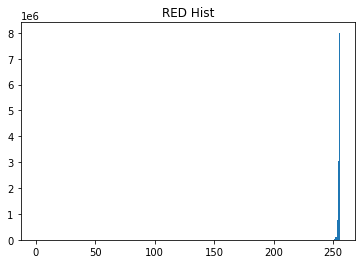

In [58]:
plt.title("RED Hist")
plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
plt.show()


8006752.0

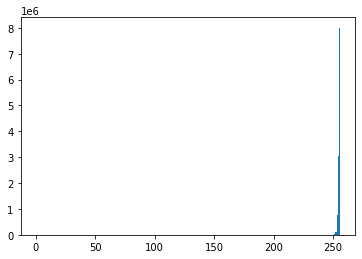

In [96]:
RED = plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
len(RED)
max(RED[0])

In [98]:
# Finding image mean
# image_mean1 = sum(count_R.*binslocation_R)/sum(count_R);

# image_mean = sum(RED[0]*RED[1])/sum(RED[0])

ValueError: operands could not be broadcast together with shapes (256,) (257,) 

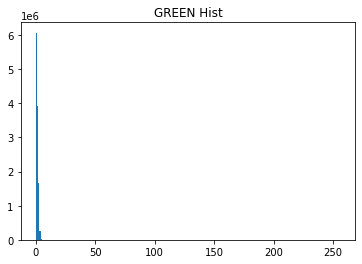

In [59]:
plt.title("GREEN Hist")
plt.hist(bgr_planes[1].ravel(),256,[0,256]) 
plt.show()


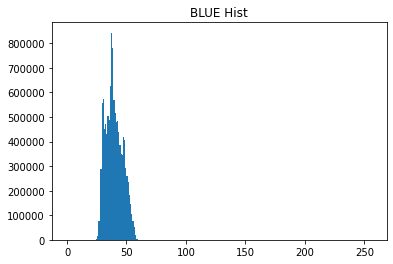

In [61]:
plt.title("BLUE Hist")
plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
plt.show()


Finding MAX vale in R,G,B

In [69]:
bgr_planes[2][0]
print(bgr_planes[2][0].shape)
print(bgr_planes[2].shape)

(2592,)
(4608, 2592)


In [78]:
bgr_planes[2]

array([[248, 248, 248, ..., 222, 218, 215],
       [248, 248, 248, ..., 225, 219, 218],
       [250, 250, 249, ..., 230, 226, 223],
       ...,
       [254, 253, 252, ..., 246, 246, 246],
       [252, 252, 252, ..., 246, 245, 245],
       [251, 253, 254, ..., 246, 245, 245]], dtype=uint8)

BLUE index 50 value : 258864.0


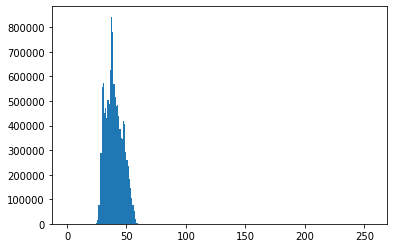

In [108]:
#BLUE BLUE[50] -> y value
BLUE = plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
len(BLUE)
# max(BLUE[0])
print("BLUE index 50 value : {}".format(BLUE[0][50]))

In [113]:




#  RED/RED + BLUE
img_m = max(RED[0])/(max(RED[0])+BLUE[0][50])
print("SPO2 : {}".format(img_m*100))

SPO2 : 96.86818260127255
